In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from io import StringIO
from datetime import datetime

raw_str: str = '''
DATA,H,L,C,TR,N
20021102,0.7220,0.7124,0.7124,0.0096,0.0134
20021104,0.7170,0.7073,0.7073,0.0097,0.0132
20021105,0.7099,0.6723,0.6723,0.0176,0.0134
20021106,0.6930,0.6800,0.6838,0.0130,0.0134
20021107,0.6960,0.6736,0.6736,0.0224,0.0139
20021108,0.6820,0.6706,0.6706,0.0114,0.0137
20021111,0.6820,0.6710,0.6710,0.0114,0.0136
20021112,0.6795,0.6720,0.6744,0.0085,0.0134
20021113,0.6760,0.6550,0.6616,0.0210,0.0138
20021114,0.6650,0.6585,0.6627,0.0065,0.0134
20021115,0.6701,0.6620,0.6701,0.0081,0.0131
20021118,0.6965,0.6750,0.6965,0.0264,0.0138
20021119,0.7065,0.6944,0.6944,0.0121,0.0137
20021120,0.7115,0.6944,0.7087,0.0171,0.0139
20021121,0.7168,0.7100,0.7124,0.0081,0.0136
20021122,0.7265,0.7120,0.7265,0.0145,0.0136
20021125,0.7265,0.7098,0.7098,0.0167,0.0138
20021126,0.7184,0.7110,0.7184,0.0086,0.0135
20021127,0.7280,0.7200,0.7228,0.0096,0.0133
20021202,0.7375,0.7227,0.7359,0.0148,0.0134
20021203,0.7447,0.7310,0.7389,0.0137,0.0134
20021204,0.7420,0.7140,0.7162,0.0280,0.0141
20021205,0.7340,0.7207,0.7284,0.0178,0.0143
'''

df: DataFrame = pd.read_csv(StringIO(raw_str), delimiter=',')
df['DATA'] = df['DATA'].apply(lambda d: datetime.strptime(str(d), '%Y%m%d').date())
print(df['DATA'])


0     2002-11-02
1     2002-11-04
2     2002-11-05
3     2002-11-06
4     2002-11-07
5     2002-11-08
6     2002-11-11
7     2002-11-12
8     2002-11-13
9     2002-11-14
10    2002-11-15
11    2002-11-18
12    2002-11-19
13    2002-11-20
14    2002-11-21
15    2002-11-22
16    2002-11-25
17    2002-11-26
18    2002-11-27
19    2002-12-02
20    2002-12-03
21    2002-12-04
22    2002-12-05
Name: DATA, dtype: object


In [52]:
# import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.dates as mdates

hs: Series = df['H']
#print(hs)
d_size: int = len(df)
import matplotlib.finance as mpf

date_fmt = mdates.DateFormatter('%Y-%m-%d')

fig: Figure = plt.figure(figsize=(11, 5))

ax_h: Axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax_h.set_xticks(range(0, d_size), 1)
ax_h.xaxis.set_major_formatter(date_fmt)
ax_h.xaxis.set_major_locator(mdates.AutoDateLocator())

# ax_h.twinx().plot(df['DATA'], df['C'], color='y')
ax_h.plot(df['DATA'], df['H'], color='r')
ax_h.plot(df['DATA'], df['C'])
ax_h.plot(df['DATA'], df['L'])

ax_2: Axes = ax_h.twinx()
ax_2.plot(df['DATA'], df['TR'])
ax_2.plot(df['DATA'], df['N'])

plt.show()


2
Index(['date', 'open', 'close', 'high', 'low', 'volume', 'code'], dtype='object')


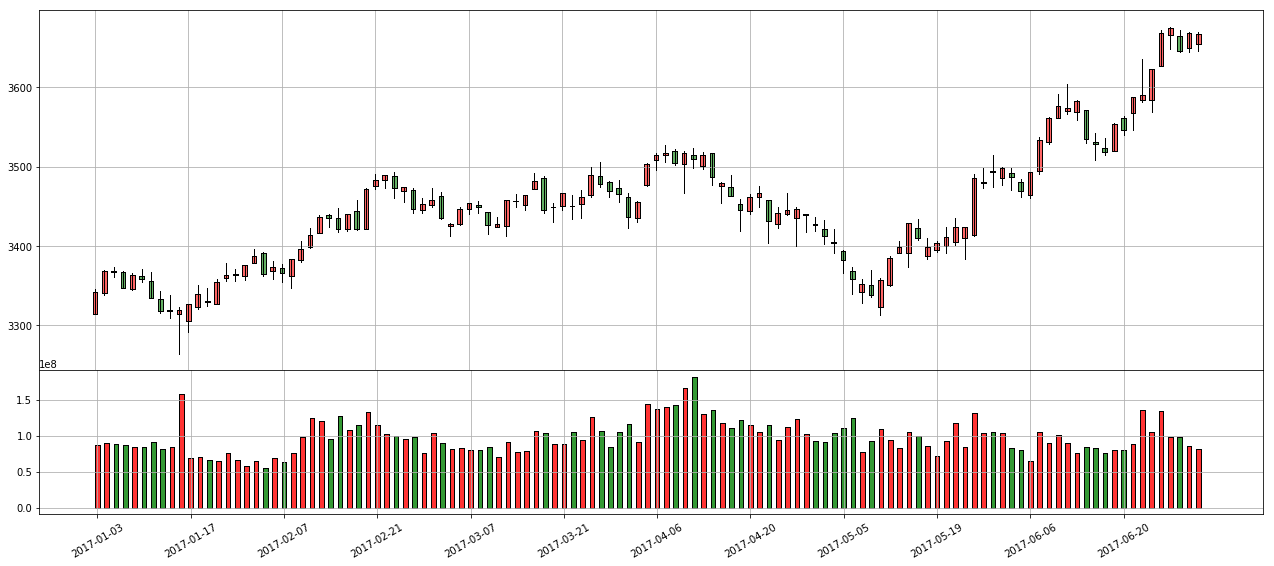

In [17]:
#example from https://zhuanlan.zhihu.com/p/28584048
# import talib
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

data: DataFrame = ts.get_k_data('399300', index=True, start='2017-01-01', end='2017-06-31')
print(len(data.axes))
print(data.keys())
# sma_10 = talib.SMA(np.array(data['close']), 10)
# sma_30 = talib.SMA(np.array(data['close']), 30)

fig = plt.figure(figsize=(17, 10))
ax = fig.add_axes([0, 0.2, 1, 0.5])
ax2 = fig.add_axes([0, 0, 1, 0.2])

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],
                      width=0.5, colorup='r', colordown='g', alpha=0.6)
ax.set_xticks(range(0, len(data['date']), 10))
# ax.plot(sma_10, label='10 日均线')
# ax.plot(sma_30, label='30 日均线')
ax.legend(loc='upper left')
ax.grid(True)

mpf.volume_overlay(ax2, data['open'], data['close'], data['volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10], rotation=30)
ax2.grid(True)

plt.show()
